## Analyse exploratoire des données du dataset `employee_survey_data.csv`

### **Sommaire**

1. [Importation des bibliothèques](#importation)
2. [Chargement des données](#chargement)
3. [Aperçu général](#apercu)
4. [Gestion des valeurs manquantes](#missing-check)
5. [Gestion des valeurs dupliquées](#doublons)
6. [Vérification des types de données](#types)
7. [Résumé initial du dataset](#resume)
8. [Analyse des distributions](#distributions)
9. [Traitement des valeurs manquantes](#missing-handling)
10. [Détection des valeurs aberrantes](#outliers)
11. [Analyse des corrélations](#correlation)
12. [Analyse univariée](#univariee)
13. [Analyse bivariée](#bivariee)
14. [Sauvegarde du dataset nettoyé](#sauvegarde)

---

### 1. <a id='importation'>Importation des bibliothèques</a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement des données</a>

In [35]:
employee_data = pd.read_csv("../data/employee_survey_data.csv")

---

### 3. <a id='apercu'>Aperçu général</a>

In [36]:
print(f"Nombre de lignes : {employee_data.shape[0]}")
print(f"Nombre de colonnes : {employee_data.shape[1]}")

Nombre de lignes : 4410
Nombre de colonnes : 4


In [37]:
print("Informations de base :")
employee_data.info()

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [38]:
print(f"Sommaire des statistiques : \n{employee_data.describe()}")

Sommaire des statistiques : 
        EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
count  4410.000000              4385.000000      4390.000000      4372.000000
mean   2205.500000                 2.723603         2.728246         2.761436
std    1273.201673                 1.092756         1.101253         0.706245
min       1.000000                 1.000000         1.000000         1.000000
25%    1103.250000                 2.000000         2.000000         2.000000
50%    2205.500000                 3.000000         3.000000         3.000000
75%    3307.750000                 4.000000         4.000000         3.000000
max    4410.000000                 4.000000         4.000000         4.000000


In [39]:
print("Nombre de valeurs uniques par colonne :")
for column in employee_data.columns:
    print(f"- {column} : {employee_data[column].nunique()} valeurs uniques")

Nombre de valeurs uniques par colonne :
- EmployeeID : 4410 valeurs uniques
- EnvironmentSatisfaction : 4 valeurs uniques
- JobSatisfaction : 4 valeurs uniques
- WorkLifeBalance : 4 valeurs uniques


In [40]:
display(employee_data.head())

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


---

### 4. <a id='missing-check'>Gestion des valeurs manquantes</a>

In [41]:
if (employee_data.isnull().sum() > 0).any():
    missing_values = employee_data.isnull().sum()[employee_data.isnull().sum() > 0]
    missing_percentage = (missing_values / len(employee_data) * 100).round(2)
    print("Valeurs manquantes par colonne :")
    for col in missing_values.index:
        print(f"{col} : {missing_values[col]} valeurs ({missing_percentage[col]}%)")
else:
    print("Il n'y a pas de valeurs manquantes dans le dataset")

Valeurs manquantes par colonne :
EnvironmentSatisfaction : 25 valeurs (0.57%)
JobSatisfaction : 20 valeurs (0.45%)
WorkLifeBalance : 38 valeurs (0.86%)


Comme le nombre de valeurs manquantes est très faible (> 2% des données), nous pouvons nous permettre de visualiser les distributions des variables avant de décider de quelle manière gérer les valeurs manquantes.

---

### 5. <a id='doublons'>Gestion des valeurs dupliquées</a>

In [42]:
if employee_data.duplicated().sum() > 0:
    print(f"Nombre de valeurs dupliquées : {employee_data.duplicated().sum()}")
    employee_data = employee_data.drop_duplicates()
    print(f"Nombre de lignes après suppression des doublons : {employee_data.shape[0]}")
else:
    print("Il n'y a pas de valeurs dupliquées dans le dataset")

Il n'y a pas de valeurs dupliquées dans le dataset


---

### 6. <a id='types'>Vérification des types de données</a>

In [43]:
numerical_columns = employee_data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    invalid_values = employee_data[column].apply(lambda x: isinstance(x, (str)))
    if invalid_values.any():
        print(f"La colonne {column} contient des valeurs non numériques :")
        print(employee_data[invalid_values][column])
        print(DELIMITER)

if not invalid_values.any():
    print("Aucune valeur non numérique a été trouvée dans les colonnes numériques")

Aucune valeur non numérique a été trouvée dans les colonnes numériques


In [44]:
categorical_columns = employee_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Vérification des valeurs uniques dans la colonne {column}")
    print(employee_data[column].unique())
    print(DELIMITER)

---

### 7. <a id='resume'>Résumé initial du dataset</a>

**Structure générale**
- Nombre de lignes : 4410
- Nombre de colonnes : 4

‎ 

**Tableau descriptif**
| #  | Colonne                   | Type      | Description                                    | Valeurs manquantes | Moyenne | Médiane | Min | Max |
|----|---------------------------|-----------|-----------------------------------------------|--------------------|---------|---------|-----|-----|
| 1  | EmployeeID                | int64     | Identifiant unique pour chaque employé       | 0                  | -       | -       | -   | -   |
| 2  | EnvironmentSatisfaction   | float64   | Satisfaction par rapport à l’environnement   | 25                 | 2.72    | 3       | 1   | 4   |
| 3  | JobSatisfaction           | float64   | Satisfaction au travail                      | 20                 | 2.73    | 3       | 1   | 4   |
| 4  | WorkLifeBalance           | float64   | Équilibre vie pro/perso                      | 38                 | 2.76    | 3       | 1   | 4   |



‎

**Points notables**
- Pas de doublons dans le dataset, donc aucun besoin de gérer ce cas de figure
- Les scores sont tous sur une échelle de 1 à 4
- La distribution des scores est relativement équilibrée autour de la moyenne
- Le nombre de valeurs manquantes est relativement faible (moins de 1% des données)
- Les moyennes des trois métriques de satisfaction sont très proches (entre 2.72 et 2.76)

---

### 8. <a id='distributions'>Analyse des distributions</a>

#### 8.1. Sélection des colonnes pertinentes

Les colonnes suivantes seront considérées dans le cadre de cette analyse :
- `EnvironmentSatisfaction`
- `JobSatisfaction`
- `WorkLifeBalance`


In [45]:
numerical_columns = numerical_columns.drop(['EmployeeID'])
print(f"Colonnes numériques : {numerical_columns.tolist()}")

Colonnes numériques : ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']


──────────────────────────────────────────────────

#### 8.2. Histogrammes

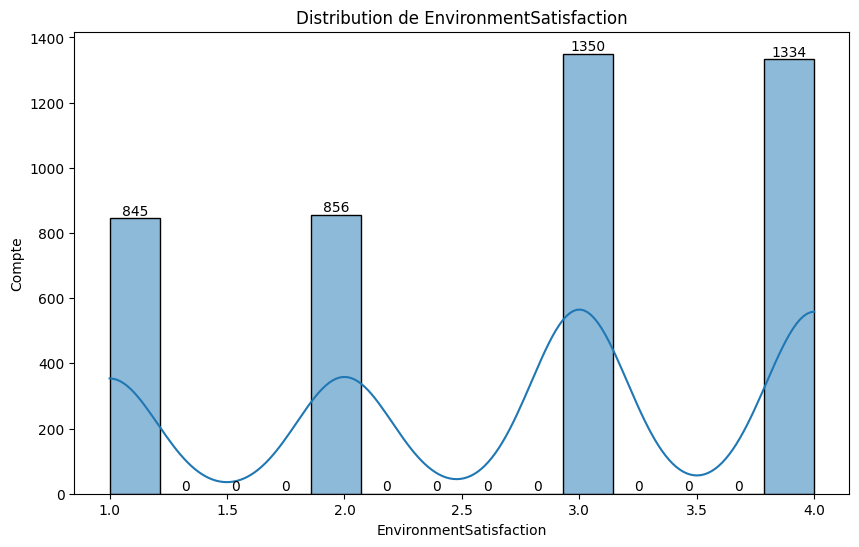

--------------------------------


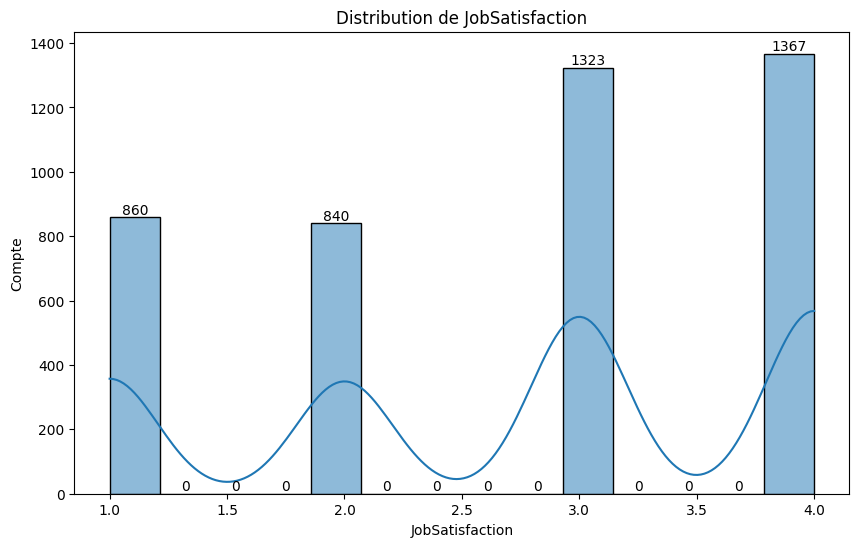

--------------------------------


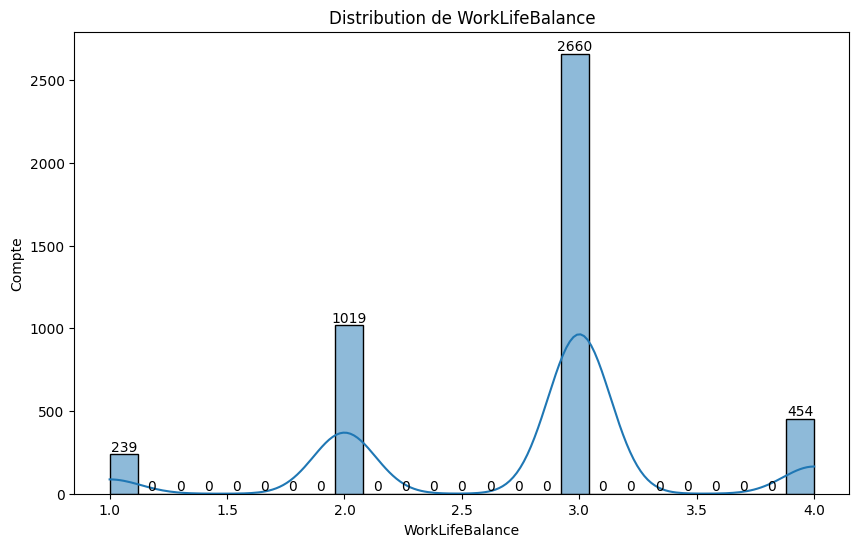

--------------------------------


In [46]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(employee_data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Compte')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

**Tableau récapitulatif**
| #  | Colonne                   | Description  |  Distribution |
|----|---------------------------|--------------|---------------|
| 1  | EnvironmentSatisfaction   | Satisfaction par rapport à l’environnement   | Relativement équilibrée avec des pics à 3 et 4 |
| 2  | JobSatisfaction           | Satisfaction au travail                      | Similaire à EnvironmentSatisfaction avec des pics bien répartis |
| 3  | WorkLifeBalance           | Équilibre vie pro/perso                      | Distribution fortement centrée sur 3 |

‎ 

**Point notables**
- Les distributions sont relativement équilibrées autour de la médiane
- Les métriques montrent des tendances positives (médianes à 3 sur 4)
- Le remplacement des valeurs manquantes par la médiane n'aura pas d'impact significatif sur les distributions

---

### 9. <a id='missing-handling'>Traitement des valeurs manquantes</a>

Comme observé précédemment, il y a très peu de valeurs manquantes dans le dataset. Pour rappel, voici les colonnes concernées :

- `EnvironmentSatisfaction` : 25 valeurs manquantes
- `JobSatisfaction` : 20 valeurs manquantes
- `WorkLifeBalance` : 38 valeurs manquantes

Maintenant que la distribution des données est connue, nous pouvons décider de quelle manière gérer les valeurs manquantes.

#### 9.1. `EnvironmentSatisfaction`

Puisque cette colonne contient des valeurs numériques *discrètes* décrivant la satisfaction par rapport à l'environnement et qu'elle montre une distribution asymétrique, nous pouvons remplacer les valeurs manquantes par la médiane de la colonne.

In [47]:
employee_data['EnvironmentSatisfaction'].fillna(employee_data['EnvironmentSatisfaction'].median(), inplace=True)
print(f"Nombre de valeurs manquantes dans EnvironmentSatisfaction après imputation : {employee_data['EnvironmentSatisfaction'].isna().sum()}")

Nombre de valeurs manquantes dans EnvironmentSatisfaction après imputation : 0


──────────────────────────────────────────────────

#### 9.2. `JobSatisfaction`

Puisque cette colonne contient des valeurs numériques *discrètes* décrivant la satisfaction au travail et qu'elle montre une distribution asymétrique elle aussi, nous pouvons remplacer les valeurs manquantes par la médiane de la colonne.

In [48]:
employee_data['JobSatisfaction'].fillna(employee_data['JobSatisfaction'].median(), inplace=True)
print(f"Nombre de valeurs manquantes dans JobSatisfaction après imputation : {employee_data['JobSatisfaction'].isna().sum()}")

Nombre de valeurs manquantes dans JobSatisfaction après imputation : 0


──────────────────────────────────────────────────

#### 9.3. `WorkLifeBalance`

Puisque cette colonne contient des valeurs numériques *discrètes* décrivant l'équilibre entre vie professionnelle et vie personnelle et qu'elle montre une distribution asymétrique elle aussi, nous pouvons remplacer les valeurs manquantes par la médiane de la colonne.

In [49]:
employee_data['WorkLifeBalance'].fillna(employee_data['WorkLifeBalance'].median(), inplace=True)
print(f"Nombre de valeurs manquantes dans WorkLifeBalance après imputation : {employee_data['WorkLifeBalance'].isna().sum()}")

Nombre de valeurs manquantes dans WorkLifeBalance après imputation : 0


──────────────────────────────────────────────────

### 10. <a id='outliers'>Détection des valeurs aberrantes</a>

#### 10.1. Génération des boxplots

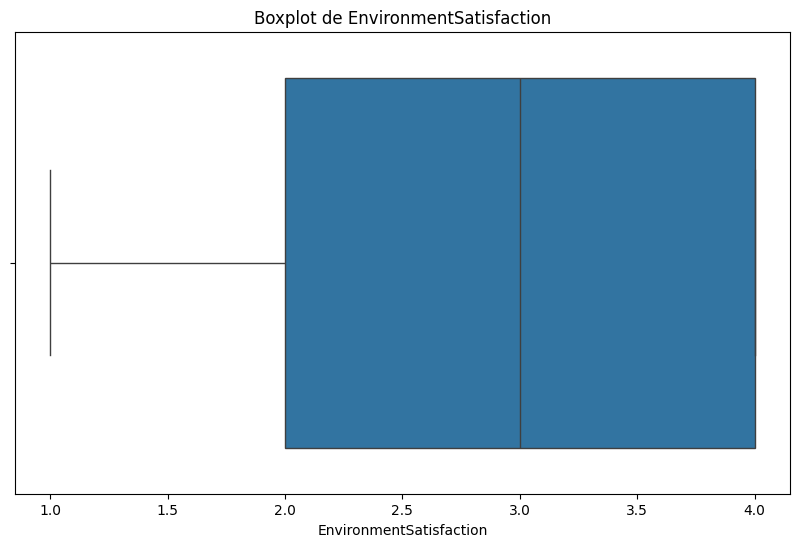

--------------------------------


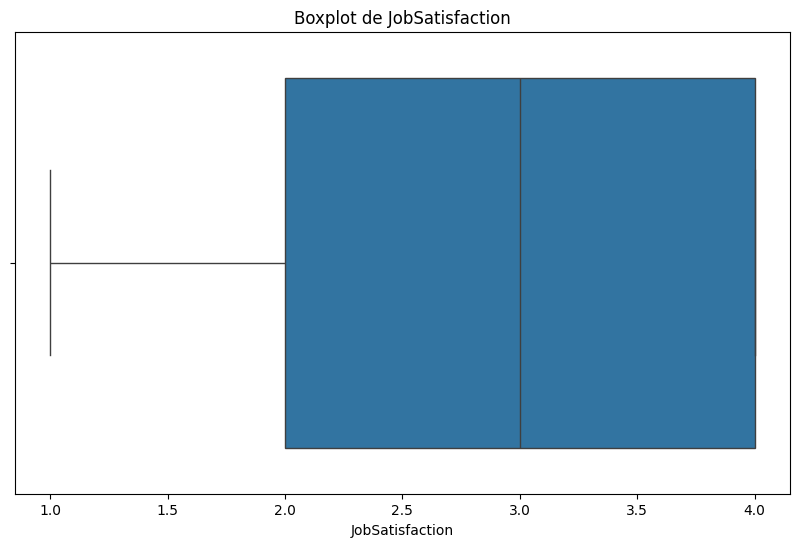

--------------------------------


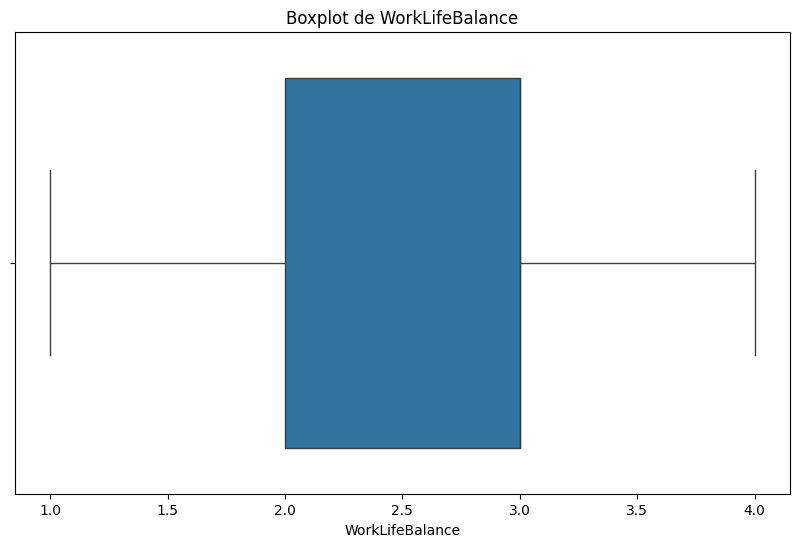

--------------------------------


In [50]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=employee_data)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    print(DELIMITER)

**Tableau récapitulatif**
| #  | Colonne                   | Description  | Distribution (Boxplot) |
|----|---------------------------|--------------|------------------------|
| 1  | EnvironmentSatisfaction   | Satisfaction par rapport à l’environnement   | Répartition équilibrée entre 1 et 4, sans outliers visibles |
| 2  | JobSatisfaction           | Satisfaction au travail                      | Distribution similaire à EnvironmentSatisfaction, pas d'outliers |
| 3  | WorkLifeBalance           | Équilibre vie pro/perso                      | Légère asymétrie, quelques valeurs proches de 1 et 4 visibles |

‎ 

**Point notable**
- Aucun outlier n'est visible sur les boxplots, ce qui suggère que les données sont cohérentes et sans valeurs aberrantes

---

### 11. <a id='correlation'>Analyse des corrélations</a>

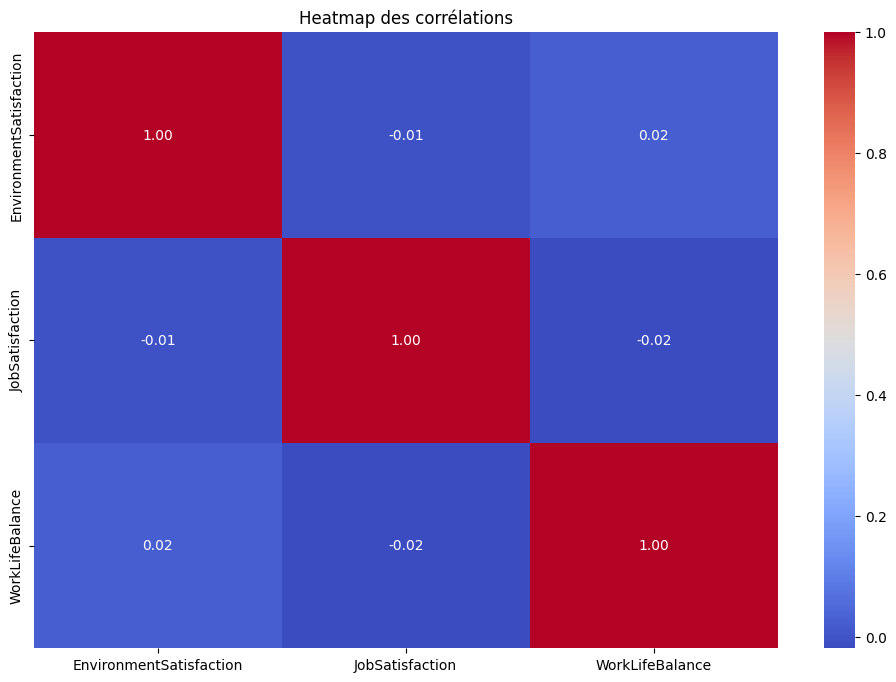

In [51]:
corr_matrix = employee_data[numerical_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap des corrélations')
plt.show()

**Tableau récapitulatif**
| #  | Colonne                   |  Corrélation avec EnvironmentSatisfaction | Corrélation avec JobSatisfaction | Corrélation avec WorkLifeBalance |
|----|---------------------------|------------------------------------------|----------------------------------|----------------------------------|
| 1  | EnvironmentSatisfaction   | 1.00                                     | -0.01                             | 0.02                             |
| 2  | JobSatisfaction           | -0.01                                    | 1.00                              | -0.02                            |
| 3  | WorkLifeBalance           | 0.02                                     | -0.02                             | 1.00                             |

‎ 

**Point notable**
- Aucune forte corrélation n'est observée entre les variables, ce qui suggère qu'elles évoluent indépendamment

---

### 12. <a id='univariee'>Analyse univariée</a>

Étant donné que [l'analyse des distributions](eda_general.ipynb#distributions), et [l'identification des outliers](eda_general.ipynb#outliers) ont déjà été faites dans des parties précédentes, il n'est pas nécessaire de les ajouter ici.

---

### 13. <a id='bivariee'>Analyse bivariée</a>

##### 13.1. Scatterplots

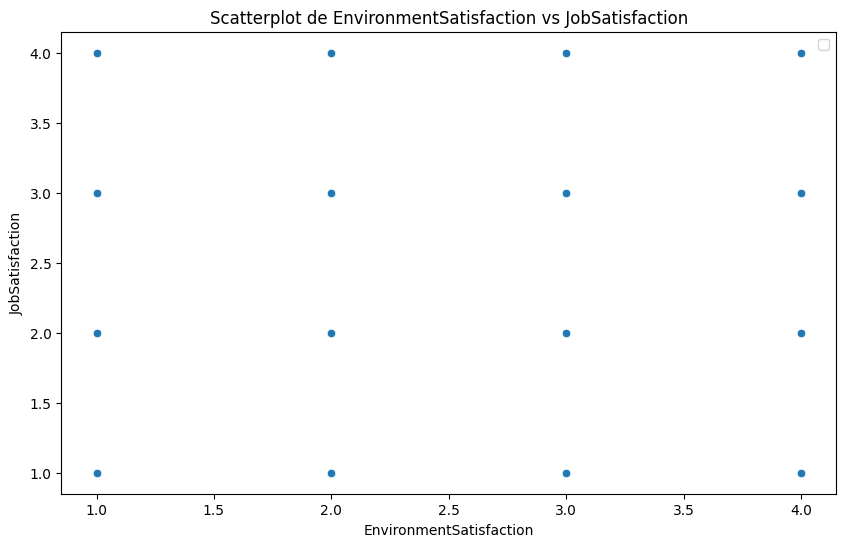

--------------------------------


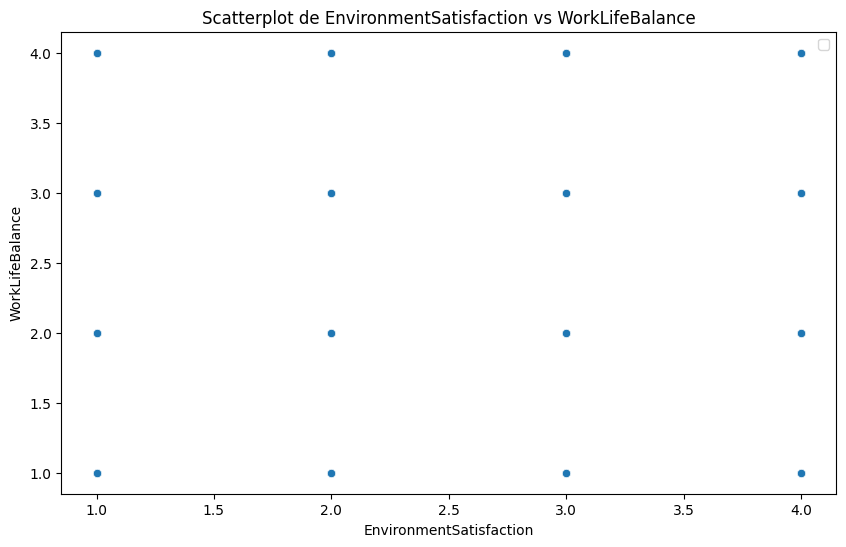

--------------------------------


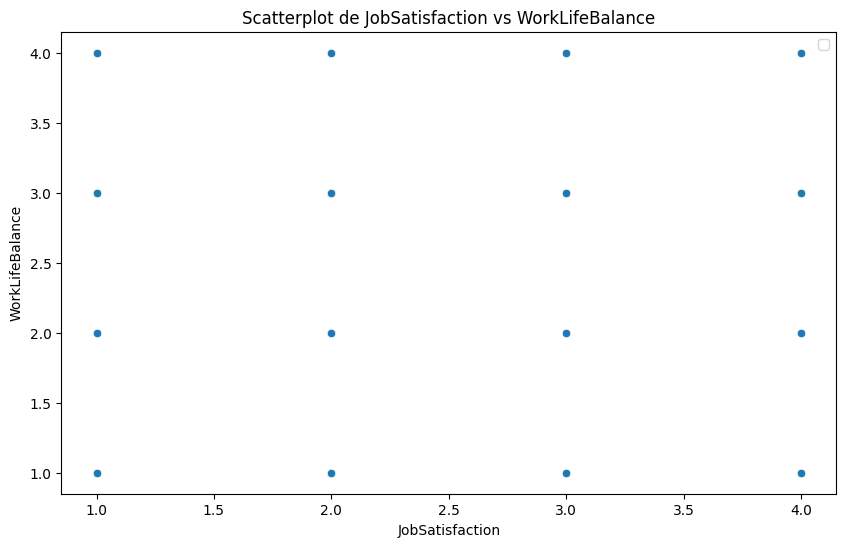

--------------------------------


In [52]:
def generate_scatterplot(data, x_var, y_var, hue_var=None):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data, x=x_var, y=y_var, hue=hue_var, palette="viridis")
    plt.title(f"Scatterplot de {x_var} vs {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title=hue_var)
    plt.show()


for i, x_var in enumerate(numerical_columns):
    for y_var in numerical_columns[i+1:]:
        generate_scatterplot(data=employee_data, x_var=x_var, y_var=y_var)
        print(DELIMITER)

**Observations**
- D'après les graphiques ci-dessus, il semblerait qu'il y ait aucune relation entre les variables, donc qu'elles évoluent indépendamment.
- Une variation dans une variable n'entraînerait aucun changement chez une autre

──────────────────────────────────────────────────

##### 13.2. KDEplots

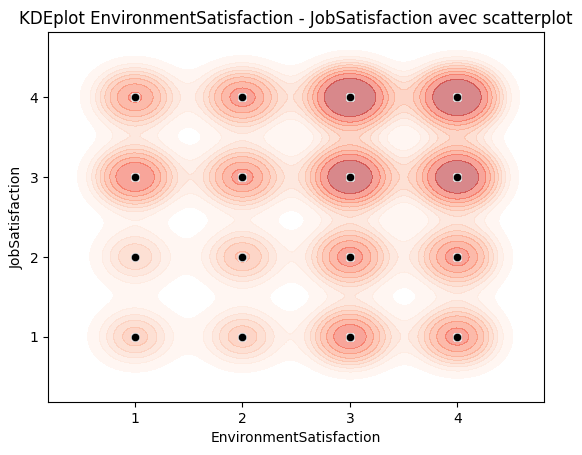

--------------------------------


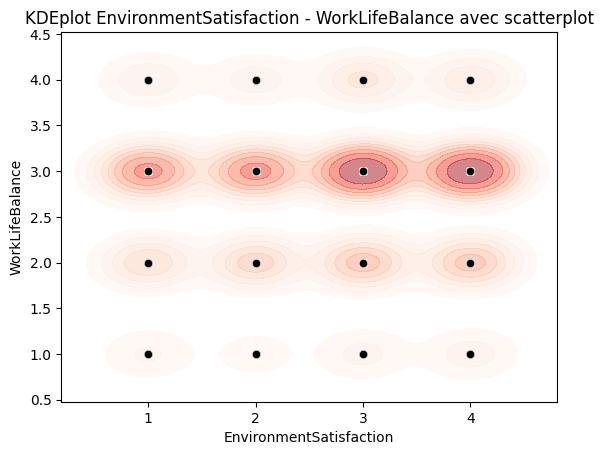

--------------------------------


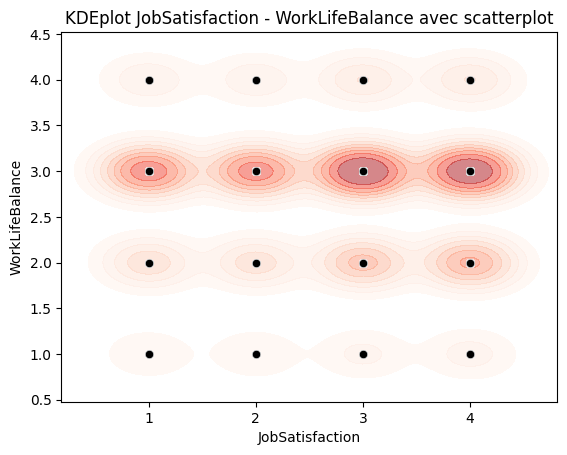

--------------------------------


In [53]:
kdeplot_pairs = [
    ('EnvironmentSatisfaction', 'JobSatisfaction'),
    ('EnvironmentSatisfaction', 'WorkLifeBalance'),
    ('JobSatisfaction', 'WorkLifeBalance')
]

for x_var, y_var in kdeplot_pairs:
    sns.kdeplot(x=employee_data[x_var], y=employee_data[y_var], fill=True, cmap="Reds", alpha=0.5)
    sns.scatterplot(x=employee_data[x_var], y=employee_data[y_var], color="black", alpha=0.7)
    plt.title(f"KDEplot {x_var} - {y_var} avec scatterplot")
    plt.show()
    print(DELIMITER)


**Observations**
- `EnvironmentSatisfaction` - `JobSatisfaction`
    - Les zones les plus denses se trouvent où `EnvironmentSatisfaction` = 3 ou 4 et `JobSatisfaction` = 3 ou 4, ce qui suggère qu'une majorité des employés sont satisfaits ou très satisfaits dans ces deux métriques
    - Les zones les moins denses se trouvent aux combinaisons faibles de satisfaction
    - Peut suggérer une corrélation potentielle entre les deux variables, mais cela a été refuté dans les étapes précédentes

- `EnvironmentSatisfaction` - `WorkLifeBalance`
    - La densité la plus élevée se trouve lorsque `EnvironmentSatisfaction` = 3 ou 4 et `WorkLifeBalance` = 3, ce qui indique que la majorité des employés ayant une satisfaction environnementale élevée perçevoit leur équilibre vie privée et vie professionnelle comme "Très satisfaisant"
    - Les combinaisons faibles de satisfaction sont très peu fréquentes, à en juger par la densité minimale sur le graphique à ces points
- `JobSatisfaction` - `WorkLifeBalance`
    - Les densités les plus élevées se trouvent autour de `JobSatisfaction` = 3 ou 4 et `WorkLifeBalance` = 3, ce qui montre que la majorité des employés ayant une satisfaction professionnelle élevée perçoivent également leur équilibre travail-vie personnelle comme "Très satisfaisant".
    - Les zones avec `JobSatisfaction` = 1 ou 2 et `WorkLifeBalance` = 1 ou 2 montrent une faible densité, ce qui indique que peu d'employés combinent une faible satisfaction professionnelle avec un mauvais équilibre travail-vie personnelle.

--------

### 14. <a id='sauvegarde'>Sauvegarde du dataset nettoyé</a>

In [54]:
employee_data.to_csv('../data/cleaned_employee_survey.csv', index=False)